# 교차 검증과 그리드 서치

## 검증 세트
- 테스트 세트를 너무 많이 사용하면 모델이 테스트 세트로 학습이 될 수 있음
    - 모델 알고리즘에 사용되면 해당 테스트세트의 패턴을 저장하게 됨
    - 즉, 테스트 세트는 마지막에 한번만 사용하는 것이 좋다
- 검증세트
    - 모델의 상태(과대/과소 적합)를 파악하기 위한 데이터 세트
    - 보통 트레인 세트에서 검증세트를 분리해서 사용함
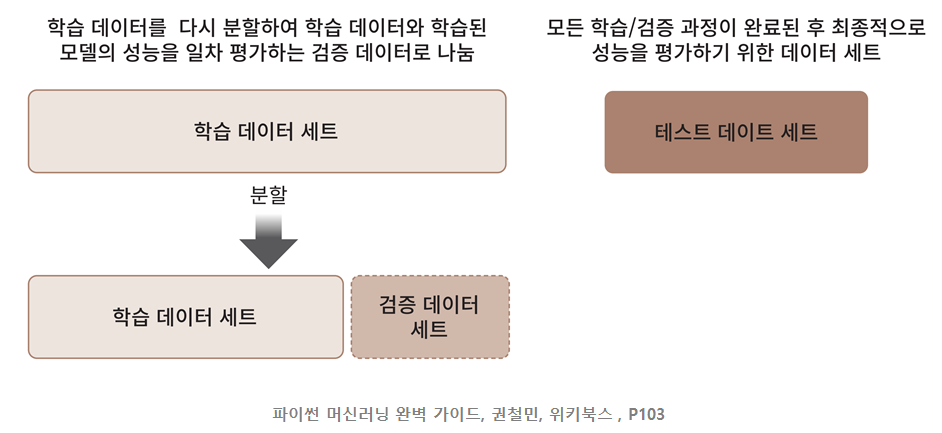

### 교차 검증 방법
- K 폴드 교차 검증
- Stratified K 폴드 교차 검증

### K 폴드 교차 검증
- K개의 데이터 폴드 세트를 만들어서
- K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
- 가장 보편적으로 사용되는 교차 검증 기법

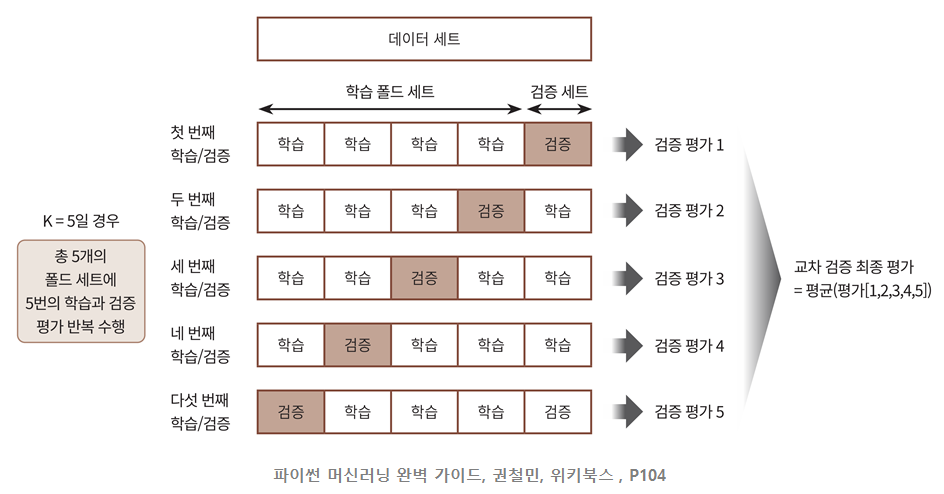

K 폴드 교차 검증 프로세스 구현을 위한 사이킷런 클래스

(1) KFold 클래스 : 폴드 세트로 분리하는 객체 생성
- kfold = KFold(n_splits=5)

(2) split() 메소드 : 폴드 데이터 세트로 분리
- kfold.split(features)
- 각 폴드마다  
    학습용, 검증용, 테스트 데이터 추출  
    학습용 및 예측 수행  
    정확도 측정  
    
(3) 최종 평균 정확도 계산

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target

print('붓꽃 데이터 세트 크기:',features.shape[0])

- features  : 150개 데이터
- 5개로 나누므로 학습용 데이터는 120, 검증용 데이터는 30
- KFold 객체의 split() 함수를 사용해서 폴드 데이터 세트로 분리
- 폴드 별 학습용, 검증용 데이터 세트의 행 인덱스 반환

In [52]:
# 폴드 별 학습용, 검증용 데이터 세트의 행 인덱스 확인


In [53]:
n_iter = 0
#     print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
#           .format(n_iter, accuracy, train_size, test_size))
#     print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
# print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 

### Stratified K 폴드 교차 검증
- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- 특정 레이블값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우친 경우
- 학습 데이터와 검증 데이터 세트가 가지는 레이블 분포도가 유사하도록 검증 데이터 추출
- 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배
- (stratify : 계층화하다)

- KFold로 분할된 레이블 데이터 세트가 
- 전체 레이블 값의 분포도를 반형하지 못하는 문제 해결

Stratified K 폴드 교차 검증 방법이 사용되는 예
- 대출 사기 데이터 예측 

- 데이터 세트 : 1억 건  
- feature 수십 개  
- 대출 사기 여부를 뜻하는 레이블   
   - 대출 사기 : 1  
   - 정상 대출 : 0  
- 대출 사기 건수 : 약 1000 건 (전체의 0.00001 %)      
    
- 이렇게 작은 비율로 1 레이블 값이 있다면
- K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 
- 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생
- 즉, 레이블 값으로 1이 특정 개별 반복별 학습/테스트 데이터 세트에는 
- 상대적으로 많이 들어 있어도,
- 다른 반복 학습/테스트 데이터 세트에는 적게 포함되어 있을 수 있음


- 그러나, 대출 사기 레이블이 1인 레코드는 비록 건수는 적지만 
- 알고리즘이 대출 사기를 예측하기 위한 중요한 피처 값을 가지고 있기 때문에 
- 매우 중요한 데이터 세트이므로
- 대출 사기 레이블 값의 분포를 원본 데이터에서의 분포와 유사하게 
- 학습/데이터 세트에서도 유지하는 게 매우 중요
- 따라서, 원본 데이터의 레이블 분포를 먼저 고려한 뒤 
- 이 분포와 동일하게 학습과 검증 데이터 세트를 분배하는 방식인
- Stratified K 폴드 교차 검증 방법 사용해서 예측

* Stratified K 폴드

* 먼저 K 폴드 문제점 확인하고, 
* 사이킷런의 Stratified K 폴드 교차 검증 방법으로 개선
* 붓꽃 데이터 세트를 DataFrame으로 생성하고 
* 레이블 값의 분포도 확인

In [ ]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

In [1]:
# print('## 교차 검증: {0}'.format(n_iter))
# print('학습 레이블 데이터 분포:\n', label_train.value_counts())
# print('검증 레이블 데이터 분포:\n', label_test.value_counts())



In [ ]:
# 동일한 데이터 분할을 StratifiedKFold로 수행하고
from sklearn.model_selection import StratifiedKFold



In [ ]:
# StratifiedKFold를 이용해 붓꽃 데이터 교차 검증
dt_clf = DecisionTreeClassifier(random_state=156)

# print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
#       .format(n_iter, accuracy, train_size, test_size))
# print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
   
# # 교차 검증별 정확도 및 평균 정확도 계산 
# print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
# print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 



Stratified K 폴드의 경우
* 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로
* 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해서 교차 검증해야 함
* 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할되어야 함
* 회귀(Regression)에서는 Stratified K 폴드 지원되지 않음 
    - 이유 : 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에
    - 결정값별로 분포를 정하는 의미가 없기 때문

## 교차 검증을 보다 간편하게 해 주는 사이킷런 API

교차 검증 (Cross Validation) 과정  
(1) 폴드 세트 설정  
(2) for 문에서 반복적으로 학습 및 검증 데이터 추출 및 학습과 예측 수행  
(3) 폴드 세트별로 예측 성능을 평균하여 최종 성능 평가

교차 검증을 보다 간편하게 해 주는 사이킷런 API
- cross_val_score() 함수 
- (1) ~ (3)단계의 교차 검증 과정을 한꺼번에 수행
- 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation) 시켜주므로
- 간단하게 교차 검증 수행 가능

cross_val_score() 주요 파라미터  
cross_val_score(estimator, X, y, scoring, cv)

- estimator : Classifier 또는 Regressor (분류 또는 회귀)
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표 
- cv : 교차 검증 폴드 수

cross_val_score(dt_clf, data, label, scoring='accuracy‘, cv=3)

* cross_val_score()는 cv로 지정된 횟수만큼
* scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환
* 일반적으로 평가 결과값 평균을 평가 수치로 사용

In [ ]:
# cross_val_score() 사용
# 교차 검증 폴드 수 : 3
# 성능 평가 지표 : accuracy (정확도)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target


print('교차 검증별 정확도:', scores)
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


- **교차검증 수행시 해당 모델에서 얻을 수 있는 최상의 성능점수를 가늠해 볼 수 있음**

### 참고
- 비슷한 API로 cross_validate()이 있음
- 여러 개의 평가 지표 반환
- 학습 데이터에 대한 성능 평가 지표와 수행 시간도 제공
- cross_val_score() : 단 하나의 평가 지표만 가능
- 그러나 보통 cross_val_score() 하나만으로도 대부분의 경우 쉽게 사용 가능
- **주의**
    - cross_validate() 는 데이터를 섞어 폴드를 나누지 않는다
        - 앞에 분할할때 섞었기 때문에 다시 섞지 않아도 되긴 함
    - 데이터를 섞은 후 분할을 하고자 한다면 StratifiedKFold()함수를 사용함
        - 회귀 모델인 경우는 KFold 사용
    - n_splits=10은 몇개의 폴딩을 할 것인지 결정
    - shuffle=True 섞을것인지 결정

### 하이퍼 파라미터 (Hyper parameter)
- 모델링할 때 사용자가 직접 세팅해주는 값
- 여러 하이퍼 파라미터를 순차적으로 변경하면서  
- 최고 성능을 가지는 파라미터 조합을 찾을 수 있음
- max_depth, min_samples_split, iteration 등

- 머신러닝 알고리즘을 구성하는 주요 구성 요소로
- 이 값들을 조정해 알고리즘의 예측 성능을 개선할 수 있음

### GridSearchCV 클래스
- 사이킷런에서는 GridSearchCV 클래스를 이용해서
- Classifier나 Regressor와 같은 알고리즘에 사용되는
- 하이퍼 파라미터를 순차적으로 입력하면서
- 최적의 파라미터를 편리하게 도출할 수 있는 방법 제공  
- (Grid는 격자라는 의미 : 촘촘하게 파라미터를 입력하면서 테스트 하는 방식)

즉,  
- 머신러닝 알고리즘의 여러 하이퍼 파라미터를  
- 순차적으로 변경하면서 최고 성능을 가지는 파라미터를 찾고자 한다면  
- 파라미터의 집합을 만들어 순차적으로 적용하면서 최적화 수행  

## 하이퍼파라미터 튜닝
- 하이퍼파라미터 : 사용자 지정 파라미터(모델이 직접 세팅할 수 없어서 사용자가 세팅해야 함)
- 튜닝 방법
    1. 모델의 기본 세팅값을 이용해서 그대로 훈련
    2. 검증세트의 점수나 교차검증을 통해서 매개변수를 조금씩 바꿔봄
    - tip. 하이퍼파라미터를 한개씩 바꿔보는 것이 아니고 여러개의 매개변수를 동시에 바꿔가면서 튜닝을 해야 함
    3. 모든 경우의 수를 확인해서 for문을 돌릴 수도 있지만 많이 번거롭고, 그 기능을 해주는 함수가 마련되어 있음
        - GridSearchCV()

### GridSearchCV
- Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서
    - 최적의 파라미터를 편리하게 도출할 수 있는 방법 제공  
        - (Grid는 격자라는 의미 : 촘촘하게 파라미터를 입력하면서 테스트 하는 방식)

- 즉,  
    - 머신러닝 알고리즘의 여러 하이퍼 파라미터를  
    - 순차적으로 변경하면서 최고 성능을 가지는 파라미터를 찾고자 한다면  
    - 파라미터의 집합을 만들어 순차적으로 적용하면서 최적화 수행  

- **GridSearchCV 클래스 생성자의 주요 파라미터**

    - estimator : classifier, regressor, peipeline

    - param_grid : key + 리스트 값을 가지는 딕셔너리 (estimator 튜닝을 위한 하이퍼 파라미터 )
         - key: 파라미터명, 리스트값:파라미터 값
    - scoring : 예측 성능을 측정할 평가 방법 
         - 성능 평가 지표를 지정하는 문자열
         - 예: 정확도인 경우 'accuracy'
    - cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수
    - refit : 최적의 하이퍼 파라미터를 찾은 뒤 
        - 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 여부
        - 디폴트 : True    


-  parmas 파라미터
    - {'하이퍼파라미터명' : [튜닝할 수치들]}

In [ ]:
# GridSearchCV를 이용해
# 결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해서
# 붓꽃 데이터 예측 분석

# GridSearchCV 클래스 객체 생성
# fit(학습 데이터 세트) 이용

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
# DecisionTreeClassifier 객체 생성
dtree = DecisionTreeClassifier()

# 하이퍼 파라미터 설정


###  참고
- min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
    - min_samples_split=4로 설정하는 경우
    - 최소 샘플 개수가 4개 필요한데
    - 3개만 있는 경우에는 더 이상 자식 규칙 노드를 위한 분할을 하지 않음
        - 트리 깊이도 줄어서 더 간결한 결정 트리 생성

In [ ]:
import pandas as pd

In [60]:
# GridSearchCV 결과 세트로 딕셔너리 형태인 cv_results_ 를 DataFrame으로 변환 후
# 필요한 파라미터 값만 추출
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


### tip.
- n_jobs=-1 : cpu의 모든 성능을 다 사용
    - gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [64]:
print('GridSearchCV 최적 파라미터:',  ) 
print('GridSearchCV 최고 정확도: {0:.4f}'.format( )) 

{'min_impurity_decrease': 0.0001}


In [65]:

print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


일반적인 머신러닝 모델 적용 방법
* 일반적으로 학습 데이터를 GridSearchCV를 이용해 
* 최적 하이퍼 파라미터 튜닝을 수행한 뒤에
* 별도의 테스트 세트에서 이를 평가하는 방식

- **여러개의 하이퍼파라미터 튜닝**
    - 딕셔너리로 생성
    - 여러 하이퍼 파라미터에 대해 여러 값으로 모델링을 진행 후 성능을 평가해 볼 수 있다
        - 수행횟수 
            - min_impurity_decrease:9 X max_depth:15 X min_samples_split: 10 X cv:5

- 하이퍼파라미터 튜닝수 파라미터값의 간격은 정해진 규칙은 없다.
    - 조금 더 넓거나 좁은 간격으로 진행해볼 수 도 있음
- 랜덤서치 기능도 있음
    - 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률분포 객체를 전달
       - ex. uniform, randint 등